## Word2Vec이 표상하는 의미 관계

* Word2Vec 결과 벡터는 단어의 compositionality를 반영한다고 주장(Mikolov et al. 2013b)
* 가장 유명한 예는 "king - man + woman = queen."
    - "king"이 [+ 전제군주, +남자]로 분석된다고 가정
    - 이 성분분석 결과에서 "+남자"를 제외하고 "+여자"를 포함하면 [+전제군주, +여자] 이므로 "queen"이 산출 
* 단어 벡터가 유사한 경우는 의미적 관련이 높은 단어임 
* 단어 간 벡터를 빼고 더하는 방식으로 유추(analogy)가 가능. 


### 배경 지식: 의미 관계(Sementic Relation) 

Source : Lobner, Sebastian. 2013. Understanding Semantics (2nd edition). Routledge.

*개념 분류의 정확성을 따지기보다는 개념에 대해 조금 더 자세히 생각해본다는 측면에서 참고* 

1. **Synonymy**
    - **Two expressions are synonymous iff they have the same meaning**
    - While total synonymy is rare or trivial, there are many cases of **partial synonymy**. 
    - 완전한 동의어는 찾기 Personal Computer - PC 같은 관계일 수 있지만 매우 드물다.
    - 일상적으로는 어떤 맥락에서 동일한 의미로 쓰이는 표현의 쌍을 말한다. 
    
    
2. **Hyponymy**
    - An expression A is a hyponym of of an expression B -  ans B a hyperonym of A iff
        - the meaning of B is a proper part of the meaning of A and 
        -  A is a logical suordinate of B, i.e. A entails B. 
    - '오리'는 '새'의 하위어이고, '새'는 '오리'의 상위어이다. 어떤 것이 오리이면, 그것은 새이다(함의 관계).
    
    
3. **Oppositions**
    * **Antonymy**
        - Two expressions are antonyms iff they express two opposite extremes out of a range of possibilities.
        - 두 개의 표현이 서로 가능성의 범위를 벗어나는 반대편 극단을 가리킨다면 Antonymy이다. 
        - old/young, old/new, big/small, thick/thin
        - Antonymy는 논리적으로 양립 불가능하지만(imcompatable) 상보적이지는 않다(not complementary)
      
    * **Directional opposites**
        - Two expressions are directional opposites iff they express opposite cases with respect to a common axis
        - 두 개의 표현이 같은 축에서 서로 반대 방향의 경우를 표현한다면 Directional opposites
        - in front of/behind, right of /left of, below/above 
     
    * **Complementary opposition**
        - Two expressions are complementaries iff they express an either-or alternative in some domain     
        - 두 개의 표현이 어떤 도메인에서 이분법적인 대안을 표현하는 경우 complementaries
        - *not even* means the same as *odd*. 
        - 범주형 변수가 되기 좋은 유형(이라고 생각함)
        
    * **Heteronymy**
        - Expressions are heteronyms iff they denote alternatives in some domain of more than two possibilities.
        - 여러 표현이 특정 도메인에서 서로 대안이 되는 경우 heteronyms
        - Sunday, Monday, Tuesday, Wednesday, Friday, Satureday  
        - 범주형 변수가 되기 좋은 유형(이라고 생각함)
        
    * **Converses**
        - Two expressions are converses of each other iff they express the same relation between two entities, but with reversed roles
        - 두 개의 표현이 두 개체간의 같은 관계를 표현하지만, 개체의 역할만 바꾸는 경우 converse
            - x is above y <=> y is below x
            - x is before y <=> y is after x
            - x borrows z from y <=> y lends z to x
 
4. **Lexical Fields**
    * **A lexical field is a group of lexemes that fulfils the following conditions:**
        - the lexemes are of the same word class (동일한 품사)
        - their meanings have something in common (의미에 공통점이 있음)
        - they are interrelated by precisely definable meaning relations (정확하게 정의할 수 있는 의미 관계에 의해 상호 연관)
        - the group is complete in terms of the relevant meaning relations (관련된 의미 관계의 측면에서 완전한 그룹) 
        - {Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saterday, Sunday} * 순환적 순서 관계 
        - {above, below, infront of, behind, right of, left of} 
        - {adult, women, man, child, girl, boy} * 성별과 연령으로 구성된 어휘장
        
    * **Taxonomies**
        - A set of expressions is a taxonomy iff:
            - they form a concepture hierarchy in terms of hyponymy
            - hyponyms denote sub-kinds of what their hyperonyms denote. 
            - animal- (horse, cow, pig, dog, cat, elephant, tiger, crocodile...)
            - dog - (huskey, terrier, basset, collie)
            
    * **Mereology, Meronymies**
        - A set of expressions forms a mereology iff they form a hierarchy in terms of holonyms and meronyms, where A is a **meronym** of B, and B is **holonym** of A, iff A denotes constitutive parts of the kind of thing that B denotes.
        - body - (head, neck, trunk, leg, arm...)
    
### 질문
    
   1. Word2Vec은 주로 어떤 의미 관계를 나타내는가? 
       - Word2vec은 단어의 빈도와 순서를 동시에 고려하는 알고리즘이다. 
       - 즉, 어떤 표현의 벡터가 유사하다면 이들은 유사한 도메인의 유사한 맥락에서 대체될 수 있는 표현들일 것이다.  
       - Complementary opposition, Heteronymy와 같은 반의 관계에 속한 표현들이 이 조건에 부합한다.
       - 확인해 보자. 
    
    
   2. 그렇다면 Word2Vec을 통해 얻은 단어의 벡터는 어떻게 사용하는 것이 좋을까?
   

### DATA

21세기 세종계획 세종형태분석말뭉치 (약 1,000어절 규모)

### 작업 순서

1. **전처리**
    1. 어절 단위로 분리된 형태분석 말뭉치를 p 태그 단위(문장? 문단? 단위로) 변환한다.
    2. 곧은 따옴표(",')를 <따옴표>로 치환한다. 
    3. "/"를 "_" 로 치환한다. 
    4. 형용사파생접미사(XSA), 동사파생접미사(XSV)는 바로 앞의 형태와 연결하여 형용사, 동사로 치환한다. (공부+하 => 공부하/VV)
    5. 보조용언(VX)은 바로 앞의 형태와 연결하며 V태그를 준다. (올려다+보 => 올려다_보/V)
    6. NNG(일반명사) 태그가 있는 모든 표현을 'N'으로 치환한다 (Optional, 명사 외 다른 요소에 집중하고 싶다면)

2. **구 탐지(Phrase detection, gensim library)**
    1. 전처리 결과를 모두 합친 후 gensim library의 phrase detection을 2회 실행한다. (자주 쓰이는 최대 4어절까지 결합)
    2. 전처리 결과에 형태분석 말뭉치에 phrase detection 결과를 반영한다. 

3. **Word2Vec**
    1. Word2Vec을 실시하여 단어 벡터를 구한다. 
    2. 각 의미 관계를 대표하는 단어와 유사한 단어들을 확인한다. 
    3. t-sne를 이용하여 표현 간의 관계를 확인한다.
    

In [1]:
import os              # 파일을 리스트로 추출하기 위한 모듈
import codecs          # unicode를 변환하기 위한 위한 모듈 

print(os.getcwd())     # 작업 폴더 확인 
os.chdir('F:/소희/2020_Word2Vec/Corpus') #작업 폴더 변경
path_dir = 'F:/소희/2020_Word2Vec/Corpus'    # 세종형태분석 말뭉치가 들어있는 폴더 알려주기
file_list = os.listdir(path_dir) # 폴더 안의 파일명으로 리스트 만들기 (총 278개 항목) 
file_list.sort()       # 리스트 정렬 
print(file_list[0:5])  # 파일을 리스트로 출력

------
* 아래는 세종형태분석 말뭉치의 어절 단위 분절을 문장 단위 분절로 치환하는 과정(head 제외)
* 딕셔너리를 사용하여 해당 문장이 어느 파일에 있었는지 확인할 수 있도록 처리(Just in Case) 
* 단, Word2Vec만을 위한 것이라면 바로 리스트로 만들어도 무방함. 

#### 세종형태분석말뭉치의 구조 (예시)
< p >  
BTAA0003-00000030	장점이	장점/NNG + 이/JKS<br>
BTAA0003-00000031	사회의	사회/NNG + 의/JKG<br>
BTAA0003-00000032	우선적	우선/NNG + 적/XSN<br>
BTAA0003-00000033	가치로	가치/NNG + 로/JKB<br>
BTAA0003-00000034	부각될	부각/NNG + 되/XSV + ㄹ/ETM<br>
BTAA0003-00000035	때	때/NNG<br>
BTAA0003-00000036	그	그/MM<br>
BTAA0003-00000037	민족은	민족/NNG + 은/JX<br>
BTAA0003-00000038	융성했고,	융성/NNG + 하/XSV + 았/EP + 고/EC + ,/SP<br>
BTAA0003-00000039	단점이	단점/NNG + 이/JKS<br>
BTAA0003-00000040	판을	판/NNG + 을/JKO<br>
BTAA0003-00000041	치면	치/VV + 면/EC<br>
BTAA0003-00000042	쇠잔의	쇠잔/NNG + 의/JKG<br>
BTAA0003-00000043	길로	길/NNG + 로/JKB<br>
BTAA0003-00000044	접어든	접어들/VV + ㄴ/ETM<br>
BTAA0003-00000045	것이	것/NNB + 이/JKS<br>
BTAA0003-00000046	역사의	역사/NNG + 의/JKG<br>
BTAA0003-00000047	진리이기도	진리/NNG + 이/VCP + 기/ETN + 도/JX<br>
BTAA0003-00000048	하다.	하/VX + 다/EF + ./SF<br>
< /p >  

In [2]:
import re  # 정규식 모듈
lines = [] # 빈 리스트
texts = [] # 빈 리스트
morph = [] # 빈 리스트
dic = {} # 빈 딕셔너리
sent = "" # 빈 문자열 

# 1번 과정 수행 (1-F 제외)

for file in file_list: # 파일 리스트에서 파일을 하나씩 불러온다. 
    with open(file, 'r', encoding='utf_16_le') as f: # 파일을 열어서 f라고 한다. 
        lines = f.readlines() # 라인을 하나씩 읽어들여서 리스트에 담는다. 
        #print(lines)
        number = 0
        for i in lines: #라인을 순서대로 불러온다. 
            linename = file + "_" + str(number) # 텍스트의 위치를 확인하기 위한 작업 (optional)
            number = int(number)+1
            if(re.search("\<p\>",i)):
                morph = i
                morph = morph.replace("\n"," ") #엔터를 공백으로 치환
                sent = sent + morph
                #print(sent)
            elif(re.search("^[A-Z]{4}[0-9]{4}-[0-9]{8}",i)):#어절 번호가 붙어있는 라인이라면
                morph = str.split(i,"\t")
                morph = morph[2] # 형태 분석 부분만 가져옴
                morph = morph.replace(" ","") # 공백 지우기 (" + "를 "+"로)
                morph = morph.replace("\n", " ") #엔터를 공백으로 치환
                morph = re.sub("([가-힣]+?)/[A-Z]{2,3}\+([가-힣]+?)/XSA","\\1\\2/VA",morph) #형용사파생접미사 처리
                morph = re.sub("([가-힣]+?)/[A-Z]{2,3}\+([가-힣]+?)/XSV","\\1\\2/VV",morph) #동사파생접미사 처리
                morph = re.sub("[\"\']","<따옴표>",morph) #따옴표 처리
                if (re.search("^<p>",sent)):sent = sent + morph # <p>로 시작하는 경우 morph 연결
                #print(sent)
            elif(re.search("\<\/p\>",i)):
                morph = i
                morph = morph.replace("\n"," ")
                if (re.search("^<p>",sent)):sent = sent + morph  # <p>로 시작하는 경우 morph 연결
                sent = re.sub("([가-힣]+?)/[A-Z]{2,3} ([가-힣]+?)/VX","\\1_\\2/V",sent) #보조용언 처리
                # print(sent) 
                dic[linename] = sent
                sent= "" #하나의 문장을 완성하여 딕셔너리에 넣은 다음 다시 빈 문자열로 만든다. 
            else:
                pass


In [3]:
print(list(dic.items())[0])

('BTAA0001.txt_143', '<p> 프랑스/NNP+의/JKG 세계/NNG+적/XSN+이/VCP+ㄴ/ETM 의상/NNG 디자이너/NNG 엠마누엘/NNP 웅가로/NNP+가/JKS 실내/NNG 장식/NNG+용/XSN 직물/NNG 디자이너/NNG+로/JKB 나서/VV+었/EP+다/EF+./SF </p> ')


In [4]:
#각 문장을 Key로 하고, 형태 단위 분절 결과를 value로 하는 Dictionary 만들기
words = {}
for i in dic.values():
    a = re.split('[\+ ]',i)
    b = [x for x in a if x]
    words[i] = b 

In [5]:
list(words.values())[0]

['<p>',
 '프랑스/NNP',
 '의/JKG',
 '세계/NNG',
 '적/XSN',
 '이/VCP',
 'ㄴ/ETM',
 '의상/NNG',
 '디자이너/NNG',
 '엠마누엘/NNP',
 '웅가로/NNP',
 '가/JKS',
 '실내/NNG',
 '장식/NNG',
 '용/XSN',
 '직물/NNG',
 '디자이너/NNG',
 '로/JKB',
 '나서/VV',
 '었/EP',
 '다/EF',
 './SF',
 '</p>']

In [6]:
## 일반명사/고유명사 연쇄를 N으로 치환하는 처리 (1-F 포함)
## 대명사, 수사, 명사파생접미사 결합형 등은 편의상 처리 안함. 

import re  # 정규식 모듈
lines = [] # 빈 리스트
texts = [] # 빈 리스트
morph = [] # 빈 리스트
dic_removeN= {} # 빈 딕셔너리
sent = "" # 빈 문자열 

for file in file_list: # 파일 리스트에서 파일을 하나씩 불러온다. 
    with open(file, 'r', encoding='utf_16_le') as f: # 파일을 열어서 f라고 한다. 
        lines = f.readlines() # 라인을 하나씩 읽어들여서 리스트에 담는다. 
        #print(lines)
        number = 0
        for i in lines: #라인을 순서대로 불러온다. 
            linename = file + "_" + str(number) # 텍스트의 위치를 확인하기 위한 작업 (파일명을 알 필요가 없다면 리스트로 만들어도 됨)
            number = int(number)+1
            if(re.search("\<p\>",i)):
                morph = i
                morph = morph.replace("\n"," ") #엔터를 공백으로 치환
                sent = sent + morph
                #print(sent)
            elif(re.search("^[A-Z]{4}[0-9]{4}-[0-9]{8}",i)):#어절 번호가 붙어있는 라인이라면
                morph = str.split(i,"\t")
                morph = morph[2] # 형태 분석 부분만 가져옴
                morph = morph.replace(" ","") # 공백 지우기 (" + "를 "+"로)
                morph = morph.replace("\n", " ") #엔터를 공백으로 치환
                morph = re.sub("([가-힣]+?)/[A-Z]{2,3}\+([가-힣]+?)/XSA","\\1\\2/VA",morph) #형용사파생접미사 처리
                morph = re.sub("([가-힣]+?)/[A-Z]{2,3}\+([가-힣]+?)/XSV","\\1\\2/VV",morph) #동사파생접미사 처리
                morph = re.sub("[\"\']","<따옴표>",morph) #따옴표 처리
                if (re.search("^<p>",sent)):sent = sent + morph # <p>로 시작하는 경우 morph 연결
                #print(sent)
            elif(re.search("\<\/p\>",i)):
                morph = i
                morph = morph.replace("\n"," ")
                if (re.search("^<p>",sent)):sent = sent + morph  # <p>로 시작하는 경우 morph 연결
                sent = re.sub("[가-힣0-9_a-zA-Z]+?/(NN[GP])","<N>",sent) # 일반명사 치환
                sent = re.sub("(<N>[\s\+])+","N",sent) # 명사 연쇄 처리
                sent = re.sub("([가-힣]+?)/[A-Z]{2,3} ([가-힣]+?)/VX","\\1_\\2/V",sent)#보조용언 처리
                # print(sent) 
                dic_removeN[linename] = sent
                sent= "" #하나의 문장을 완성하여 딕셔너리에 넣은 다음 다시 빈 문자열로 만든다. 
            else:
                pass

In [7]:
print(list(dic_removeN.items())[0])

('BTAA0001.txt_143', '<p> N의/JKG N적/XSN+이/VCP+ㄴ/ETM N가/JKS N용/XSN N로/JKB 나서/VV+었/EP+다/EF+./SF </p> ')


In [8]:
#각 문장을 Key로 하고, 형태 단위 분절 결과를 value로 하는 Dictionary 만들기
words_removeN = {}
for i in dic_removeN.values():
    a = re.split('[\+ ]',i)
    b = [x for x in a if x]
    words_removeN[i] = b 

In [9]:
list(words_removeN.items())[0]

('<p> N의/JKG N적/XSN+이/VCP+ㄴ/ETM N가/JKS N용/XSN N로/JKB 나서/VV+었/EP+다/EF+./SF </p> ',
 ['<p>',
  'N의/JKG',
  'N적/XSN',
  '이/VCP',
  'ㄴ/ETM',
  'N가/JKS',
  'N용/XSN',
  'N로/JKB',
  '나서/VV',
  '었/EP',
  '다/EF',
  './SF',
  '</p>'])

----
* Word2Vec을 수행하기 전에 Phrase Detection을 2회 수행한다. (최대 4-gram까지 연결)

In [10]:
# Phrase Detection을 위한 텍스트 합치기 (List in List) : words
sentences =  list(words.values())
print(sentences[0])

['<p>', '프랑스/NNP', '의/JKG', '세계/NNG', '적/XSN', '이/VCP', 'ㄴ/ETM', '의상/NNG', '디자이너/NNG', '엠마누엘/NNP', '웅가로/NNP', '가/JKS', '실내/NNG', '장식/NNG', '용/XSN', '직물/NNG', '디자이너/NNG', '로/JKB', '나서/VV', '었/EP', '다/EF', './SF', '</p>']


In [11]:
# Phrase Detection을 위한 텍스트 합치기 (List in List) : words_2
sentences_c =  list(words_removeN.values())
print(sentences_c[0])

['<p>', 'N의/JKG', 'N적/XSN', '이/VCP', 'ㄴ/ETM', 'N가/JKS', 'N용/XSN', 'N로/JKB', '나서/VV', '었/EP', '다/EF', './SF', '</p>']


In [12]:
# Phrase Detection
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, Phraser

phrases = Phrases(sentences)
phrases_c = Phrases(sentences_c)

2020-03-11 17:21:53,828 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-11 17:21:53,829 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2020-03-11 17:21:53,829 : INFO : collecting all words and their counts
2020-03-11 17:21:53,830 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-03-11 17:21:54,248 : INFO : PROGRESS: at sentence #10000, processed 359714 words and 149824 word types
2020-03-11 17:21:54,655 : INFO : PROGRESS: at sentence #20000, processed 693987 words and 260652 word types
2020-03-11 17:21:55,067 : INFO : PROGRESS: at sentence #30000, processed 1021580 words and 356508 word types
2020-03-11 17:21:55,453 : INFO : PROGRESS: at sentence #40000, processed 1339120 words and 440238 word types
2020-03-11 17:21:55,931 : INFO : PROGRESS: at sentence #50000, processed 1738350 words and 530956 word types
2020-03-11 17:21:56,313 : INFO 

2020-03-11 17:22:18,489 : INFO : PROGRESS: at sentence #710000, processed 19705710 words and 2801622 word types
2020-03-11 17:22:18,888 : INFO : PROGRESS: at sentence #720000, processed 20030049 words and 2831557 word types
2020-03-11 17:22:19,274 : INFO : PROGRESS: at sentence #730000, processed 20341077 words and 2860220 word types
2020-03-11 17:22:19,673 : INFO : PROGRESS: at sentence #740000, processed 20667410 words and 2893309 word types
2020-03-11 17:22:20,160 : INFO : PROGRESS: at sentence #750000, processed 21054508 words and 2935190 word types
2020-03-11 17:22:20,544 : INFO : PROGRESS: at sentence #760000, processed 21367645 words and 2958420 word types
2020-03-11 17:22:20,905 : INFO : PROGRESS: at sentence #770000, processed 21660919 words and 2985180 word types
2020-03-11 17:22:21,311 : INFO : PROGRESS: at sentence #780000, processed 21991433 words and 3013601 word types
2020-03-11 17:22:21,663 : INFO : PROGRESS: at sentence #790000, processed 22278534 words and 3036869 wor

2020-03-11 17:22:37,883 : INFO : PROGRESS: at sentence #620000, processed 13310882 words and 1037821 word types
2020-03-11 17:22:38,145 : INFO : PROGRESS: at sentence #630000, processed 13534818 words and 1046274 word types
2020-03-11 17:22:38,498 : INFO : PROGRESS: at sentence #640000, processed 13836785 words and 1058348 word types
2020-03-11 17:22:38,794 : INFO : PROGRESS: at sentence #650000, processed 14092363 words and 1068306 word types
2020-03-11 17:22:39,128 : INFO : PROGRESS: at sentence #660000, processed 14381209 words and 1087970 word types
2020-03-11 17:22:39,397 : INFO : PROGRESS: at sentence #670000, processed 14602746 words and 1095562 word types
2020-03-11 17:22:39,720 : INFO : PROGRESS: at sentence #680000, processed 14878807 words and 1113463 word types
2020-03-11 17:22:40,017 : INFO : PROGRESS: at sentence #690000, processed 15131603 words and 1132503 word types
2020-03-11 17:22:40,288 : INFO : PROGRESS: at sentence #700000, processed 15363520 words and 1140226 wor

In [13]:
#Phrase Detection 결과를 자료에 적용함. 
for i in words.keys():
    a = phrases[words[i]]
    words[i]= a

for i in words_removeN.keys():
    a = phrases_c[words_removeN[i]]
    words_removeN[i]= a

sentences =  list(words.values())
sentences_c =  list(words_removeN.values())

In [14]:
# Phrase Detection (2nd)

import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, Phraser

phrases = Phrases(sentences)
phrases_c = Phrases(sentences_c)

2020-03-11 17:24:46,404 : INFO : collecting all words and their counts
2020-03-11 17:24:46,404 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-03-11 17:24:46,792 : INFO : PROGRESS: at sentence #10000, processed 326360 words and 168534 word types
2020-03-11 17:24:47,172 : INFO : PROGRESS: at sentence #20000, processed 634291 words and 294971 word types
2020-03-11 17:24:47,553 : INFO : PROGRESS: at sentence #30000, processed 932043 words and 407554 word types
2020-03-11 17:24:47,919 : INFO : PROGRESS: at sentence #40000, processed 1223452 words and 505674 word types
2020-03-11 17:24:48,383 : INFO : PROGRESS: at sentence #50000, processed 1585919 words and 615429 word types
2020-03-11 17:24:48,775 : INFO : PROGRESS: at sentence #60000, processed 1871664 words and 703141 word types
2020-03-11 17:24:49,191 : INFO : PROGRESS: at sentence #70000, processed 2168354 words and 785291 word types
2020-03-11 17:24:49,546 : INFO : PROGRESS: at sentence #80000, processed 24

2020-03-11 17:25:11,266 : INFO : PROGRESS: at sentence #740000, processed 19199582 words and 3476798 word types
2020-03-11 17:25:11,741 : INFO : PROGRESS: at sentence #750000, processed 19559303 words and 3528331 word types
2020-03-11 17:25:12,108 : INFO : PROGRESS: at sentence #760000, processed 19849416 words and 3558946 word types
2020-03-11 17:25:12,465 : INFO : PROGRESS: at sentence #770000, processed 20123546 words and 3591824 word types
2020-03-11 17:25:12,887 : INFO : PROGRESS: at sentence #780000, processed 20431354 words and 3627398 word types
2020-03-11 17:25:13,225 : INFO : PROGRESS: at sentence #790000, processed 20700032 words and 3656603 word types
2020-03-11 17:25:13,521 : INFO : PROGRESS: at sentence #800000, processed 20932131 words and 3680970 word types
2020-03-11 17:25:13,782 : INFO : collected 3700293 word types from a corpus of 21127535 words (unigram + bigrams) and 806414 sentences
2020-03-11 17:25:13,782 : INFO : using 3700293 counts as vocab in Phrases<0 vocab

2020-03-11 17:25:30,234 : INFO : PROGRESS: at sentence #650000, processed 13681287 words and 1199277 word types
2020-03-11 17:25:30,566 : INFO : PROGRESS: at sentence #660000, processed 13962724 words and 1220588 word types
2020-03-11 17:25:30,820 : INFO : PROGRESS: at sentence #670000, processed 14178578 words and 1229345 word types
2020-03-11 17:25:31,145 : INFO : PROGRESS: at sentence #680000, processed 14447742 words and 1248858 word types
2020-03-11 17:25:31,445 : INFO : PROGRESS: at sentence #690000, processed 14694240 words and 1269477 word types
2020-03-11 17:25:31,713 : INFO : PROGRESS: at sentence #700000, processed 14920132 words and 1278377 word types
2020-03-11 17:25:32,011 : INFO : PROGRESS: at sentence #710000, processed 15169337 words and 1292721 word types
2020-03-11 17:25:32,291 : INFO : PROGRESS: at sentence #720000, processed 15401972 words and 1305264 word types
2020-03-11 17:25:32,595 : INFO : PROGRESS: at sentence #730000, processed 15660279 words and 1319954 wor

In [15]:
#Phrase Detection 결과를 자료에 적용함. 
for i in words.keys():
    a = phrases[words[i]]
    words[i]= a

for i in words_removeN.keys():
    a = phrases_c[words_removeN[i]]
    words_removeN[i]= a

sentences =  list(words.values())
sentences_c =  list(words_removeN.values())

In [16]:
os.getcwd()
os.chdir('F:/소희/2020_Word2Vec')

# 파라미터 설정
num_features = 300 # 단어 벡터의 차원 수
min_word_count = 2 # 단어의 최소 빈도 
num_workers = 4  # 병렬 처리할 thread의 수
context = 10 # 맥락의 크기
downsampling = 1e-3 # 자주 나타나는 단어에 대한 Downsample 설정

# 모델 초기화 와 훈련  (시간이 조금 걸립니다)
from gensim.models import word2vec
print ("Training model...")
model =  word2vec.Word2Vec(sentences, workers = num_workers,
                          size=num_features, 
                          min_count = min_word_count,
                          window = context,
                          sample = downsampling)

# 만약 모델을 이후에 훈련시키지 않을 거라면 메모리 효율성을 위해 아래의 코드를 실행할 것
model.init_sims(replace = True)

# 모델 이름을 파라미터를 넣어 지어 두면 좋습니다. 
model_name = "sentences_300features_40minwords_10context"
model.save(model_name)

2020-03-11 17:27:33,875 : INFO : collecting all words and their counts
2020-03-11 17:27:33,876 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-03-11 17:27:33,931 : INFO : PROGRESS: at sentence #10000, processed 308613 words, keeping 29879 word types
2020-03-11 17:27:33,981 : INFO : PROGRESS: at sentence #20000, processed 601968 words, keeping 47122 word types
2020-03-11 17:27:34,028 : INFO : PROGRESS: at sentence #30000, processed 884513 words, keeping 60677 word types
2020-03-11 17:27:34,074 : INFO : PROGRESS: at sentence #40000, processed 1161756 words, keeping 71419 word types


Training model...


2020-03-11 17:27:34,127 : INFO : PROGRESS: at sentence #50000, processed 1505039 words, keeping 81989 word types
2020-03-11 17:27:34,178 : INFO : PROGRESS: at sentence #60000, processed 1777195 words, keeping 91098 word types
2020-03-11 17:27:34,226 : INFO : PROGRESS: at sentence #70000, processed 2058484 words, keeping 97984 word types
2020-03-11 17:27:34,272 : INFO : PROGRESS: at sentence #80000, processed 2329442 words, keeping 103916 word types
2020-03-11 17:27:34,326 : INFO : PROGRESS: at sentence #90000, processed 2630121 words, keeping 108288 word types
2020-03-11 17:27:34,374 : INFO : PROGRESS: at sentence #100000, processed 2914347 words, keeping 114495 word types
2020-03-11 17:27:34,422 : INFO : PROGRESS: at sentence #110000, processed 3193160 words, keeping 119342 word types
2020-03-11 17:27:34,465 : INFO : PROGRESS: at sentence #120000, processed 3451731 words, keeping 123412 word types
2020-03-11 17:27:34,502 : INFO : PROGRESS: at sentence #130000, processed 3676040 words,

2020-03-11 17:27:37,130 : INFO : PROGRESS: at sentence #770000, processed 19241347 words, keeping 287363 word types
2020-03-11 17:27:37,182 : INFO : PROGRESS: at sentence #780000, processed 19535389 words, keeping 289358 word types
2020-03-11 17:27:37,224 : INFO : PROGRESS: at sentence #790000, processed 19792477 words, keeping 290538 word types
2020-03-11 17:27:37,262 : INFO : PROGRESS: at sentence #800000, processed 20014946 words, keeping 291675 word types
2020-03-11 17:27:37,293 : INFO : collected 292638 word types from a corpus of 20202155 raw words and 806414 sentences
2020-03-11 17:27:37,294 : INFO : Loading a fresh vocabulary
2020-03-11 17:27:37,581 : INFO : effective_min_count=2 retains 176775 unique words (60% of original 292638, drops 115863)
2020-03-11 17:27:37,582 : INFO : effective_min_count=2 leaves 20086292 word corpus (99% of original 20202155, drops 115863)
2020-03-11 17:27:37,942 : INFO : deleting the raw counts dictionary of 292638 items
2020-03-11 17:27:37,947 : IN

2020-03-11 17:28:28,331 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-03-11 17:28:28,338 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-03-11 17:28:28,342 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-03-11 17:28:28,346 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-03-11 17:28:28,347 : INFO : EPOCH - 4 : training on 20202155 raw words (13710408 effective words) took 11.9s, 1155441 effective words/s
2020-03-11 17:28:29,359 : INFO : EPOCH 5 - PROGRESS: at 6.57% examples, 1101830 words/s, in_qsize 8, out_qsize 0
2020-03-11 17:28:30,360 : INFO : EPOCH 5 - PROGRESS: at 13.77% examples, 1119033 words/s, in_qsize 7, out_qsize 0
2020-03-11 17:28:31,365 : INFO : EPOCH 5 - PROGRESS: at 21.32% examples, 1120098 words/s, in_qsize 7, out_qsize 0
2020-03-11 17:28:32,367 : INFO : EPOCH 5 - PROGRESS: at 31.07% examples, 1126369 words/s, in_qsize 8, out_qsize 0
2020-03-11 17:28:33,372 : INFO : EPOCH 5

In [17]:
# 모델 초기화 와 훈련  (시간이 조금 걸립니다)
from gensim.models import word2vec
print ("Training model...")
model_c =  word2vec.Word2Vec(sentences_c, workers = num_workers,
                          size=num_features, 
                          min_count = min_word_count,
                          window = context,
                          sample = downsampling)

# 만약 모델을 이후에 훈련시키지 않을 거라면 메모리 효율성을 위해 아래의 코드를 실행할 것
model_c.init_sims(replace = True)

# 모델 이름을 파라미터를 넣어 지어 두면 좋습니다. 
model_name = "sentences_c_300features_40minwords_10context"
model_c.save(model_name)

2020-03-11 17:28:43,195 : INFO : collecting all words and their counts
2020-03-11 17:28:43,196 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-03-11 17:28:43,232 : INFO : PROGRESS: at sentence #10000, processed 248841 words, keeping 9712 word types
2020-03-11 17:28:43,267 : INFO : PROGRESS: at sentence #20000, processed 480131 words, keeping 13597 word types
2020-03-11 17:28:43,298 : INFO : PROGRESS: at sentence #30000, processed 697986 words, keeping 17664 word types
2020-03-11 17:28:43,329 : INFO : PROGRESS: at sentence #40000, processed 921282 words, keeping 20748 word types
2020-03-11 17:28:43,367 : INFO : PROGRESS: at sentence #50000, processed 1188065 words, keeping 22997 word types


Training model...


2020-03-11 17:28:43,398 : INFO : PROGRESS: at sentence #60000, processed 1404054 words, keeping 25823 word types
2020-03-11 17:28:43,432 : INFO : PROGRESS: at sentence #70000, processed 1623583 words, keeping 27973 word types
2020-03-11 17:28:43,464 : INFO : PROGRESS: at sentence #80000, processed 1845587 words, keeping 29494 word types
2020-03-11 17:28:43,499 : INFO : PROGRESS: at sentence #90000, processed 2090899 words, keeping 30689 word types
2020-03-11 17:28:43,533 : INFO : PROGRESS: at sentence #100000, processed 2310461 words, keeping 32012 word types
2020-03-11 17:28:43,567 : INFO : PROGRESS: at sentence #110000, processed 2539816 words, keeping 33668 word types
2020-03-11 17:28:43,596 : INFO : PROGRESS: at sentence #120000, processed 2745591 words, keeping 35244 word types
2020-03-11 17:28:43,624 : INFO : PROGRESS: at sentence #130000, processed 2935581 words, keeping 36397 word types
2020-03-11 17:28:43,664 : INFO : PROGRESS: at sentence #140000, processed 3209668 words, kee

2020-03-11 17:28:45,702 : INFO : PROGRESS: at sentence #780000, processed 16584871 words, keeping 115422 word types
2020-03-11 17:28:45,734 : INFO : PROGRESS: at sentence #790000, processed 16794486 words, keeping 115938 word types
2020-03-11 17:28:45,753 : INFO : collected 116235 word types from a corpus of 16912252 raw words and 794650 sentences
2020-03-11 17:28:45,754 : INFO : Loading a fresh vocabulary
2020-03-11 17:28:45,837 : INFO : effective_min_count=2 retains 58152 unique words (50% of original 116235, drops 58083)
2020-03-11 17:28:45,837 : INFO : effective_min_count=2 leaves 16854169 word corpus (99% of original 16912252, drops 58083)
2020-03-11 17:28:45,972 : INFO : deleting the raw counts dictionary of 116235 items
2020-03-11 17:28:45,975 : INFO : sample=0.001 downsamples 58 most-common words
2020-03-11 17:28:45,975 : INFO : downsampling leaves estimated 10275977 word corpus (61.0% of prior 16854169)
2020-03-11 17:28:46,100 : INFO : estimated required memory for 58152 words

2020-03-11 17:29:24,053 : INFO : not storing attribute cum_table
C:\Users\ssohe.DESKTOP-Q8QGC5L\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-03-11 17:29:24,130 : INFO : saved sentences_c_300features_40minwords_10context


- 각 의미관계를 대표하는 단어와 코사인 유사도가 높은 단어들을 찾아본다

In [18]:
#모델 불러오기
os.chdir('F:/소희/2020_Word2Vec')
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, Phraser

model = Word2Vec.load("sentences_300features_40minwords_10context")
model_c = Word2Vec.load("sentences_c_300features_40minwords_10context")

2020-03-11 17:29:24,136 : INFO : loading Word2Vec object from sentences_300features_40minwords_10context
C:\Users\ssohe.DESKTOP-Q8QGC5L\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-03-11 17:29:25,058 : INFO : loading wv recursively from sentences_300features_40minwords_10context.wv.* with mmap=None
2020-03-11 17:29:25,058 : INFO : loading vectors from sentences_300features_40minwords_10context.wv.vectors.npy with mmap=None
2020-03-11 17:29:25,146 : INFO : setting ignored attribute vectors_norm to None
2020-03-11 17:29:25,147 : INFO : loading vocabulary recursively from sentences_300features_40minwords_10context.vocabulary.* with mmap=None
2020-03-11 17:29:25,147 : INFO : loading trainable

In [19]:
# from model
model.wv.most_similar("컴퓨터/NNG")

2020-03-11 17:29:25,846 : INFO : precomputing L2-norms of word weight vectors


[('인터넷/NNG', 0.7669397592544556),
 ('하드웨어/NNG', 0.7327905893325806),
 ('디지털/NNG', 0.7218552827835083),
 ('데이터/NNG', 0.6999087333679199),
 ('PC/SL', 0.6879986524581909),
 ('소프트웨어/NNG', 0.6870960593223572),
 ('정보/NNG', 0.682653546333313),
 ('기계/NNG', 0.6737090945243835),
 ('프로그램/NNG', 0.668045163154602),
 ('서비스/NNG', 0.6616261005401611)]

- 유의, 반의 등 특정 의미관계보다는 동일 어휘장(또는 도메인)에 있는 명사가 코사인 유사도가 높음

In [20]:
model.wv.most_similar("월요일/NNG")

[('5/SN_시/NNB', 0.8614524602890015),
 ('2/SN_시/NNB', 0.8556644916534424),
 ('일요일/NNG', 0.8548961877822876),
 ('금요일/NNG', 0.8548704385757446),
 ('토요일/NNG', 0.8435106873512268),
 ('평일/NNG', 0.8426205515861511),
 ('목요일/NNG', 0.8416953086853027),
 ('8/SN_시/NNB', 0.8396531343460083),
 ('3/SN_시/NNB', 0.8371763229370117),
 ('오전/NNG', 0.8356262445449829)]

- Heteronymy가 상위에 있으며, 시간과 관련된 다른 명사들도 코사인 유사도가 높음

In [21]:
model.wv.most_similar("어리/VA")

[('아주/MAG_어리/VA', 0.614509105682373),
 ('외롭/VA', 0.5875849723815918),
 ('귀엽/VA', 0.5851411819458008),
 ('돌아가/VV_시/EP', 0.5818667411804199),
 ('젊/VA', 0.5721501111984253),
 ('여의/VV', 0.5683321952819824),
 ('살/VV_아_계시/V', 0.5659000277519226),
 ('그립/VA', 0.5630370378494263),
 ('나이/NNG_들/VV', 0.5597226619720459),
 ('시집오/VV', 0.5591360330581665)]

- 형용사의 경우 '나이'에 관한 형용사가 코사인 유사도가 높음
    - '아주 어리다', '나이_어리다'는 유의 관계

In [22]:
model.wv.most_similar("동물/NNG")

[('식물/NNG', 0.8067400455474854),
 ('짐승/NNG', 0.7650320529937744),
 ('생물/NNG', 0.7014598846435547),
 ('곤충/NNG', 0.6901993751525879),
 ('수컷/NNG', 0.6560781598091125),
 ('미생물/NNG', 0.6504495143890381),
 ('암컷/NNG', 0.6481583714485168),
 ('가축/NNG', 0.6415116786956787),
 ('생명체/NNG', 0.6354615688323975),
 ('자연/NNG', 0.6246423721313477)]

In [23]:
model.wv.most_similar("강아지/NNG")

[('송아지/NNG', 0.8061213493347168),
 ('제비/NNG', 0.8047556281089783),
 ('고양이/NNG', 0.7988519668579102),
 ('여우/NNG', 0.7963111400604248),
 ('대가리/NNG', 0.7860057950019836),
 ('참새/NNG', 0.782413125038147),
 ('호랑이/NNG', 0.7756799459457397),
 ('파리/NNG', 0.7675015330314636),
 ('늑대/NNG', 0.7636353969573975),
 ('황소/NNG', 0.7625186443328857)]

- 비교적 동일 위계의 단어들이 코사인 유사도가 높음
- '강아지'를 테스트했을 때에는 '고양이'와 같은 반려동물이 나올 것이라고 생각했는데, 의외.

In [24]:
model.wv.most_similar("여자/NNG")

[('남자/NNG', 0.9205589294433594),
 ('아이/NNG', 0.6939764022827148),
 ('아가씨/NNG', 0.6855772137641907),
 ('젊은이/NNG', 0.677535891532898),
 ('소녀/NNG', 0.6753712296485901),
 ('처녀/NNG', 0.6643142104148865),
 ('여성/NNG', 0.6444202661514282),
 ('사내/NNG', 0.6350328922271729),
 ('아내/NNG', 0.6313333511352539),
 ('여자/NNG_애/NNG', 0.6262873411178589)]

- 성별 관련 명사들, (대체로) 상보 반의어인 '남자'가 가장 유사한 단어

In [25]:
model.wv.most_similar("어머니/NNG")

[('아버지/NNG', 0.9209662675857544),
 ('할머니/NNG', 0.8211211562156677),
 ('엄마/NNG', 0.8151189088821411),
 ('아내/NNG', 0.8134526014328003),
 ('할아버지/NNG', 0.7971869707107544),
 ('시어머니/NNG', 0.7685655951499939),
 ('누나/NNG', 0.7102009057998657),
 ('며느리/NNG', 0.6913416385650635),
 ('친정어머니/NNG', 0.6887518167495728),
 ('누이/NNG', 0.6865763068199158)]

- 가족 관련 명사들, 부모 중 다른 한 쪽인 '아버지'가 가장 유사한 단어 (경우에 따라서 상보 반의어)

In [26]:
model.wv.most_similar("길/VA")

[('가늘/VA', 0.691684901714325),
 ('짧/VA_은/ETM', 0.6899451017379761),
 ('두껍/VA', 0.6699554920196533),
 ('무겁/VA', 0.6685548424720764),
 ('짧/VA', 0.6539257168769836),
 ('느리/VA', 0.6397981643676758),
 ('가느다랗/VA', 0.6375086307525635),
 ('성기/VA', 0.6247740387916565),
 ('밋밋하/VA', 0.6212658286094666),
 ('둥글/VA', 0.6170735359191895)]

In [27]:
model.wv.most_similar("부드럽/VA")

[('진하/VA', 0.8467683792114258),
 ('거칠/VA', 0.8432961702346802),
 ('연하/VA', 0.8186209201812744),
 ('차갑/VA', 0.8015603423118591),
 ('곱/VA', 0.7990360856056213),
 ('섬세하/VA', 0.7906703948974609),
 ('단단하/VA', 0.7826521992683411),
 ('가늘/VA', 0.7788900136947632),
 ('딱딱하/VA', 0.7777529954910278),
 ('달콤하/VA', 0.7771501541137695)]

In [28]:
model.wv.most_similar("배고프/VA")

[('심심하/VA', 0.7762110233306885),
 ('속상하/VA', 0.7651812434196472),
 ('피곤하/VA', 0.7585214376449585),
 ('시/VA', 0.7447593212127686),
 ('배/NNG_고프/VA', 0.7345293760299683),
 ('분하/VA', 0.7263780236244202),
 ('까/VV', 0.7195618152618408),
 ('술/NNG_취하/VV', 0.7150243520736694),
 ('창피하/VA', 0.7144036889076233),
 ('이쁘/VA', 0.7137448787689209)]

In [29]:
model.wv.most_similar("먹/VV")

[('얻어먹/VV', 0.7506835460662842),
 ('씹/VV', 0.7474333643913269),
 ('굶/VV', 0.7350413203239441),
 ('먹이/VV', 0.7319191694259644),
 ('맛있/VA', 0.7159647345542908),
 ('마시/VV', 0.6969956755638123),
 ('밥/NNG_먹/VV', 0.6706465482711792),
 ('끓이/VV', 0.655380368232727),
 ('먹/VV_으면서/EC', 0.6530886888504028),
 ('퍼먹/VV', 0.6471861600875854)]

In [31]:
## model_c (명사 제거)
model_c.wv.most_similar("N은/JX")

[('N는/JX', 0.9266725778579712),
 ('N역시/MAG', 0.6058539748191833),
 ('N또한/MAG', 0.566098153591156),
 ('N란/JX', 0.5369753837585449),
 ('N이란/JX', 0.5260611772537231),
 ('N역시/MAJ', 0.4921402037143707),
 ('는/JX', 0.48985689878463745),
 ('N이/JKS', 0.48546209931373596),
 ('N가/JKS', 0.454892098903656),
 ('은/JX', 0.432057648897171)]

- 동의어 '<N>는'이 상위, 동일 위치에 자주 나타나는 주격조사 '이/가'의 코사인 유사도 높음
- '역시', '또한'도 상위에 나타남


In [32]:
model_c.wv.most_similar("매우/MAG", topn=20)

[('대단히/MAG', 0.8654853105545044),
 ('무척/MAG', 0.7412440776824951),
 ('아주/MAG', 0.7268175482749939),
 ('너무나/MAG', 0.7250924110412598),
 ('상당히/MAG', 0.7229122519493103),
 ('N보다/JKB_훨씬/MAG', 0.6915700435638428),
 ('지극히/MAG', 0.6896253824234009),
 ('다소/MAG', 0.6798875331878662),
 ('N보다/JKB_더/MAG', 0.6750917434692383),
 ('극히/MAG', 0.671563446521759),
 ('퍽/MAG', 0.655924916267395),
 ('의외로/MAG', 0.6514236330986023),
 ('굉장히/MAG', 0.6432496905326843),
 ('비교적/MAG', 0.6402525901794434),
 ('유난히/MAG', 0.6288262605667114),
 ('참으로/MAG', 0.6222341656684875),
 ('너무/MAG', 0.6205868721008301),
 ('훨씬/MAG', 0.5890539884567261),
 ('몹시/MAG', 0.5860912799835205),
 ('꽤/MAG', 0.585829496383667)]

- 정도를 강조하는 부사들이 상위

In [33]:
model_c.wv.most_similar("전혀/MAG", topn=20)

[('아무런/MM', 0.6951738595962524),
 ('별로/MAG', 0.6821882724761963),
 ('별다르/VA', 0.6747763156890869),
 ('아무런/MM_N도/JX', 0.6643550395965576),
 ('전연/MAG', 0.6414397954940796),
 ('일체/MAG', 0.6117709875106812),
 ('별/MM', 0.6070399284362793),
 ('도무지/MAG', 0.5880075693130493),
 ('아무/NP_도/JX', 0.5876516103744507),
 ('결코/MAG', 0.5866241455078125),
 ('좀처럼/MAG', 0.5800111293792725),
 ('그다지/MAG', 0.5664458870887756),
 ('별반/MAG', 0.5614935159683228),
 ('N밖에/JX', 0.544471025466919),
 ('일절/MAG', 0.5286137461662292),
 ('N조차/JX', 0.5191659331321716),
 ('도저히/MAG', 0.5009344816207886),
 ('걷잡/VV_을/ETM_수/NNB', 0.4910798668861389),
 ('거의/MAG', 0.4884987771511078),
 ('특별하/VA', 0.48767322301864624)]

- 부정극어 목록들이 상위 

In [34]:
model_c.wv.most_similar("다/EC_고/JKQ_말하/VV")

[('다/EC_고/JKQ_지적하/VV', 0.7768255472183228),
 ('다/EC_고/JKQ_설명하/VV', 0.7708100080490112),
 ('다고_하/V', 0.7665227055549622),
 ('다/EC_고/JKQ_강조하/VV', 0.7621808052062988),
 ('다/EC_고/JKQ_주장하/VV', 0.7549693584442139),
 ('다/EC_』/SS_고/JKQ_말하/VV', 0.7480818033218384),
 ('다고/EC_주장하/VV', 0.7463383674621582),
 ('다/EC_고/JKQ_밝히/VV', 0.6942520141601562),
 ('다/EC_고/JKQ_답변하/VV', 0.6833134293556213),
 ('고/JKQ_말하/VV', 0.6726973056793213)]

In [35]:
model_c.wv.most_similar("수/NNB")

[('만하/VA', 0.4766919016838074),
 ('수/NNB_밖에/JX_없/VA', 0.46600502729415894),
 ('리/NNB', 0.4613650143146515),
 ('겨를/NNB', 0.45853960514068604),
 ('바/NNB', 0.4310038685798645),
 ('여지/NNB', 0.4193483889102936),
 ('수/NNB_밖에/JX', 0.41368502378463745),
 ('두말하/VV', 0.40209436416625977),
 ('턱/NNB', 0.4004043936729431),
 ('걷잡/VV_을/ETM_수/NNB', 0.3780984878540039)]

- 결론(1차)
    - Word2Vec은 어휘장을 반영. 
    - 동일 문장 성분이 추출되는 경향이 뚜렷
    - 구문의 경우 유의 구문이 나타나는 경향?
    - 반의 관계가 분명한 경우 반의어 우선 추출(대안 관계들을 포함)
- 실제 어휘 결합이 어떻게 되었는지 확인할 수 없다는 문제
    - vocabulary 목록 확인 필요

In [36]:
X=list(filter(lambda x:re.search('.+?_.+?',x),model.wv.vocab)) # model에서 어휘 결합 결과
Y=list(filter(lambda x:re.search('.+?_.+?',x),model_c.wv.vocab)) #model_c 어휘 결합 결과

In [37]:
X[1:10]

['라는/ETM_이름/NNG',
 '기하학/NNG_적/XSN',
 '고_있/V',
 'ㄹ/ETM_때/NNG',
 'ㄴ다/EC_고/JKQ_말하/VV',
 '못지않/VA_게/EC',
 '중요/NNG_시하/VV',
 '아_오/V',
 '텔레비전/NNG_시청/NNG']

In [38]:
Y[1:10]

['ㄴ다/EC_고/JKQ_말하/VV',
 '아_오/V',
 '아야_하/V_ㄴ다고/EC_주장하/VV',
 '마음껏/MAG_펼치/VV',
 'N라고/JKQ_말하/VV',
 'N02/SN_-/SS',
 '아_있/V',
 'N두/MM_가지/NNB',
 '1/SN_만/NR']

In [39]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re

from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

##그래프에서 마이너스 폰트 깨지는 문제에 대한 대처(Source : http://corazzon.github.io/matplotlib_font_setting)
mpl.rcParams['axes.unicode_minus'] = False


In [40]:
##한글폰트 설정  (Source : http://corazzon.github.io/matplotlib_font_setting)
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumSquareRound', 'C:\\Windows\\Fonts\\NanumSquareRoundB.ttf'),
 ('NanumBarunGothic', 'C:\\WINDOWS\\Fonts\\NanumBarunGothicUltraLight.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicBold.ttf'),
 ('NanumSquare', 'C:\\Windows\\Fonts\\NanumSquareL.ttf'),
 ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicLight.ttf'),
 ('NanumMyeongjo', 'C:\\WINDOWS\\Fonts\\NanumMyeongjoExtraBold.ttf'),
 ('NanumSquare', 'C:\\Windows\\Fonts\\NanumSquareB.ttf'),
 ('NanumMyeongjo', 'C:\\WINDOWS\\Fonts\\NanumMyeongjo-Regular.ttf'),
 ('NanumSquareRound', 'C:\\Windows\\Fonts\\NanumSquareRoundR.ttf'),
 ('Nanum Pen Script', 'C:\\WINDOWS\\Fonts\\NanumPen.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothic-Regular.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumSquare', 'C:\\Windows\\Fonts\\NanumSquareR.ttf'),
 ('Nanum Brush Script', 

In [104]:
path = 'C:/Windows/Fonts/NanumBarunGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=70).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [122]:
####t-sne plot###
## 표시할 단어 골라내기##

NNG = list(filter(lambda x:re.search('.+?/NNG',x),model.wv.vocab))
N = list(filter(lambda x:model.wv.vocab[x].count>2000,N)) #빈도 2000 이상 명사
V = list(filter(lambda x:re.search('.+?/V.*',x),model_c.wv.vocab))
V = list(filter(lambda x:model_c.wv.vocab[x].count>2000,V)) #빈도 2000이상 동사, 형용사 
V = list(filter(lambda x:re.search('.+?/V.*',x),model_c.wv.vocab))

In [123]:
print(len(N))
print(len(V))

271
226


In [124]:
###tsne_plot 함수 정의
def tsne_plot(X, model, filename):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in X:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2000)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig(filename)

C:\Users\ssohe.DESKTOP-Q8QGC5L\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


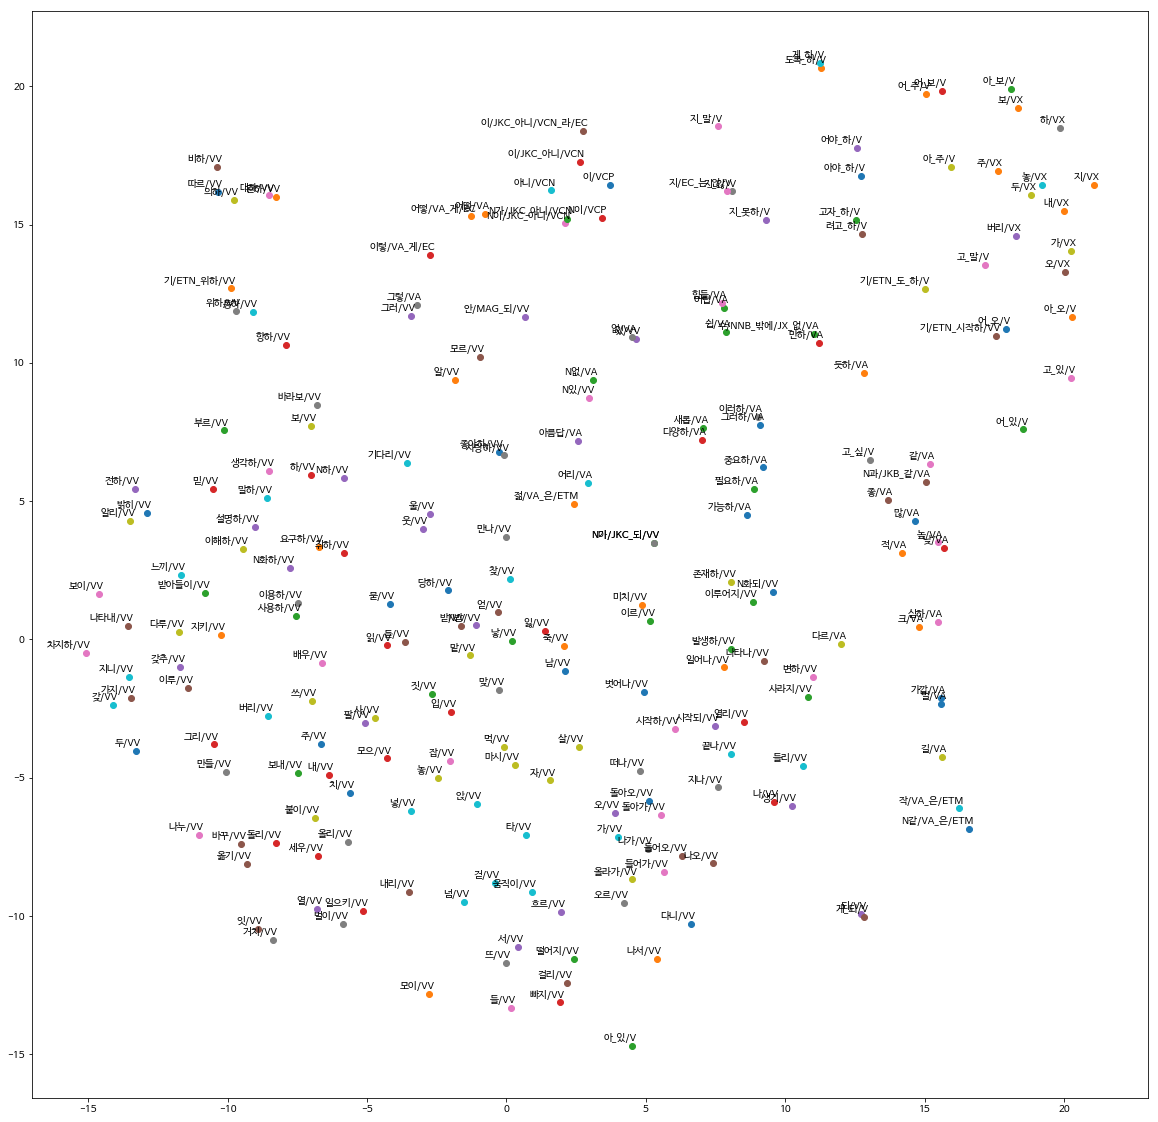

In [125]:
tsne_plot(V, model_c,'model_V.png')

C:\Users\ssohe.DESKTOP-Q8QGC5L\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


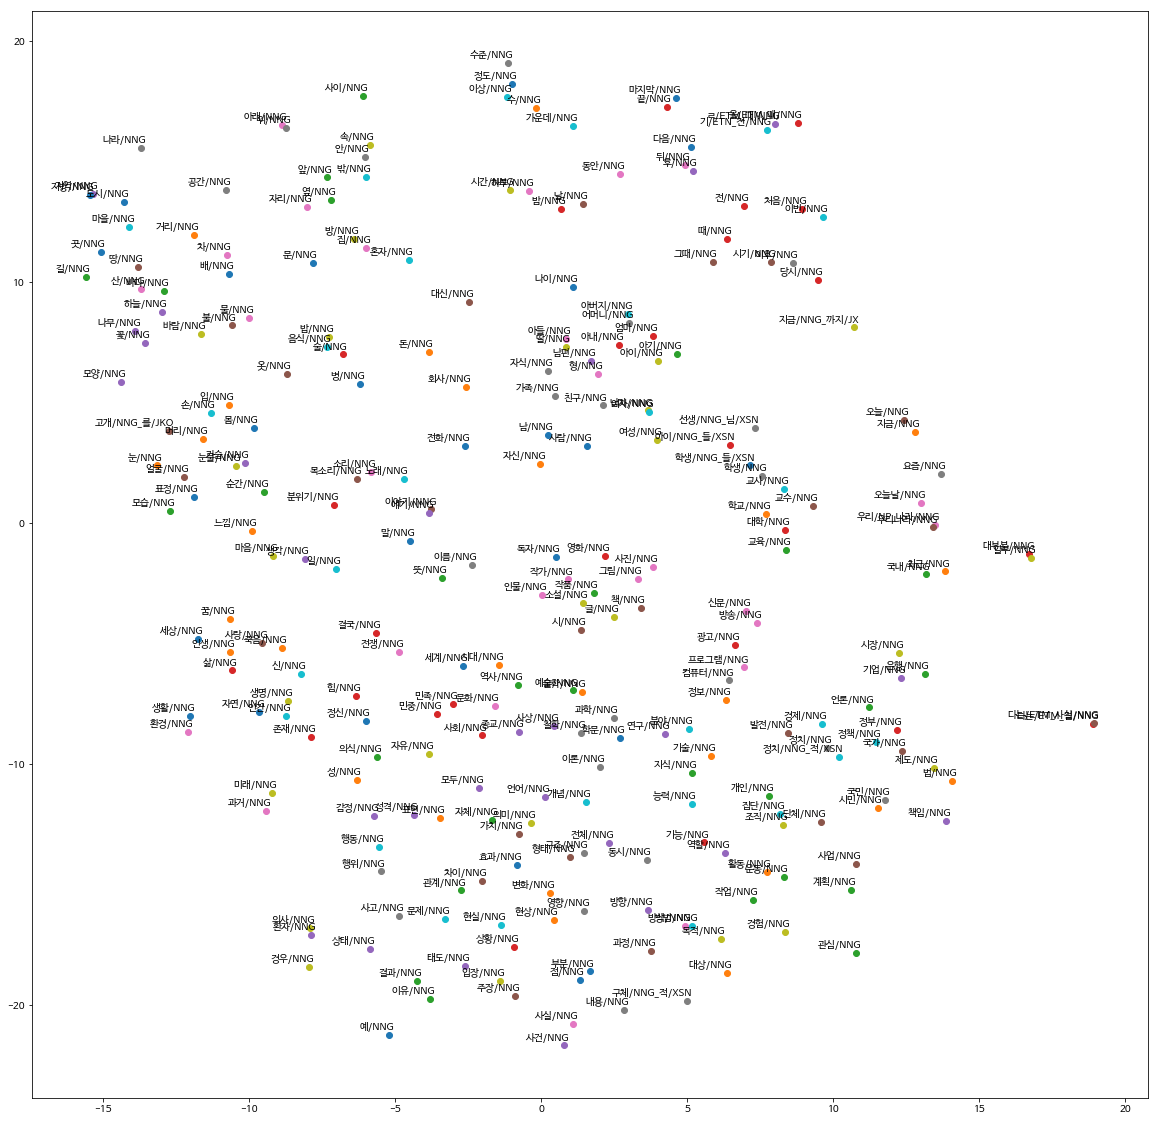

In [119]:
tsne_plot(N, model,'model_N.png')

1. **Word2Vec은 주로 의미 관계의 어떤 부분을 포착하는가?**
   - 명사의 경우 Complementary opposition, Heteronymy와 같은 반의 관계에 속한 표현들이 나타나는 경향성이 (일부) 관찰
   - 동사 또는 형용사의 경우 대체할 수 있는 유의 구문이 군집화되는 경향성이 (일부) 관찰 
   - 즉, 동일 어휘장의 계열관계를 반영할 가능성이 있음
   
   
2. **그렇다면 Word2Vec을 통해 얻은 단어의 벡터는 어떻게 사용하는 것이 좋을까?**
   - 학습 데이터의 크기를 늘리면 유의 구문도 찾아낼 수 있을 것으로 생각됨. 세종형태분석말뭉치는 약 천만 어절
   - 명사 대상 연구를 수행한다면 군집 분석 등을 통해 어휘장을 구분할 수 있을 것임. 
     - 어휘장 개념에 가까운 것을 생각해 본다면 데이터가 매우 클 경우 개체명의 태그별로 군집화될 가능성이 있음(시간, 인물, 조직 등).  
   - 유추 역시 동일 어휘장의 동일 품사 내에서 가능할 것. 
   - 단, Word2Vec은 학습 말뭉치의 분포적 특성을 반영하므로 문서의 장르 또는 도메인(법률, 금융, 스포츠 등)에 따라 결과가 바뀔 수 있을 것.
   
여하튼 데이터 크기를 키워서 다시 해 보아야 함. 